In [1]:
import h5py
import numpy as np
from qiskit.quantum_info import partial_trace
import matplotlib.pyplot as plt

In [2]:
# create |00><00| operator
v = np.array([1, 0, 0, 0])
op = np.outer(v, v.conj())
op

array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [3]:
# fidilities = []
ITER_SET = [1, 4, 7, 10]

f = h5py.File(f'free_10.h5','r')

# load the time points from the h5 file
_tp = np.array(f['QERes/t'])

tp_free = [ _tp[2 + iter*14] for iter in ITER_SET]

print(len(tp_free))
print(tp_free)


# load the density matrices from the h5 file
rho_dd = np.array(f['QERes/states'])

# print(rho.shape)


fidilities_free = [partial_trace(rho_dd[2 + iter*14,:,:], [0, 2, 4]).expectation_value(op).real for iter in ITER_SET]
# # fidilities.append(fp)
# print(fidilities_free)
f.close()

4
[510.0, 1770.0, 3030.0, 4290.0]


In [6]:
print(fidilities_free)


[0.016121508747231037, 0.10690545445502342, 0.13313064394440827, 0.17300143717506009]


In [4]:
# ITER_SET = [1, 4, 7, 10]
# t = [3*30 + iter*14*30 for iter in ITER_SET]
# t # [510, 1770, 3030, 4290]

In [5]:
ITER_SET = [1, 4, 7, 10]

f = h5py.File(f'dd_spec_10.h5','r')

# load the time points from the h5 file
_tp_dd = np.array(f['QERes/t'])
tp_dd = [ _tp_dd[2 + iter*14] for iter in ITER_SET]

print(len(tp_dd))
print(tp_dd)


# load the density matrices from the h5 file
rho_dd = np.array(f['QERes/states'])

# print(rho.shape)

fidilities_dd = [partial_trace(rho_dd[2 + iter*14,:,:], [0, 2, 4]).expectation_value(op).real for iter in ITER_SET]

# fidilities.append(fp)
print(fidilities_dd)
f.close()

4
[510.0, 1770.0, 3030.0, 4290.0]
[0.01867883345549721, 0.12400655242154716, 0.14600989911479512, 0.18267980493957045]


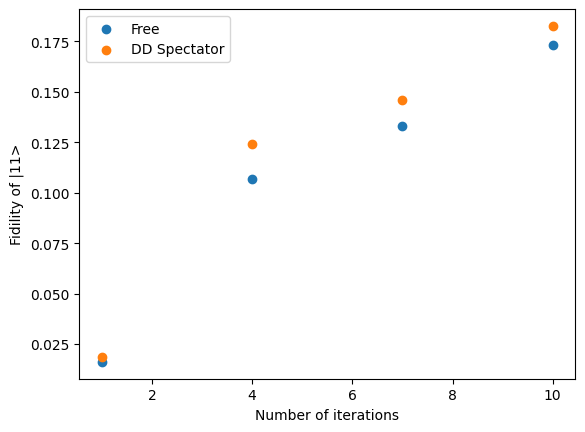

In [8]:
fig, ax = plt.subplots()
ax.scatter(ITER_SET, fidilities_free, label="Free")
ax.scatter(ITER_SET, fidilities_dd, label="DD Spectator")

ax.set_xlabel('Number of iterations')
ax.set_ylabel('Fidility of |11>')
ax.legend()
plt.show()